# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('BIGMART.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sum(df.duplicated())

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

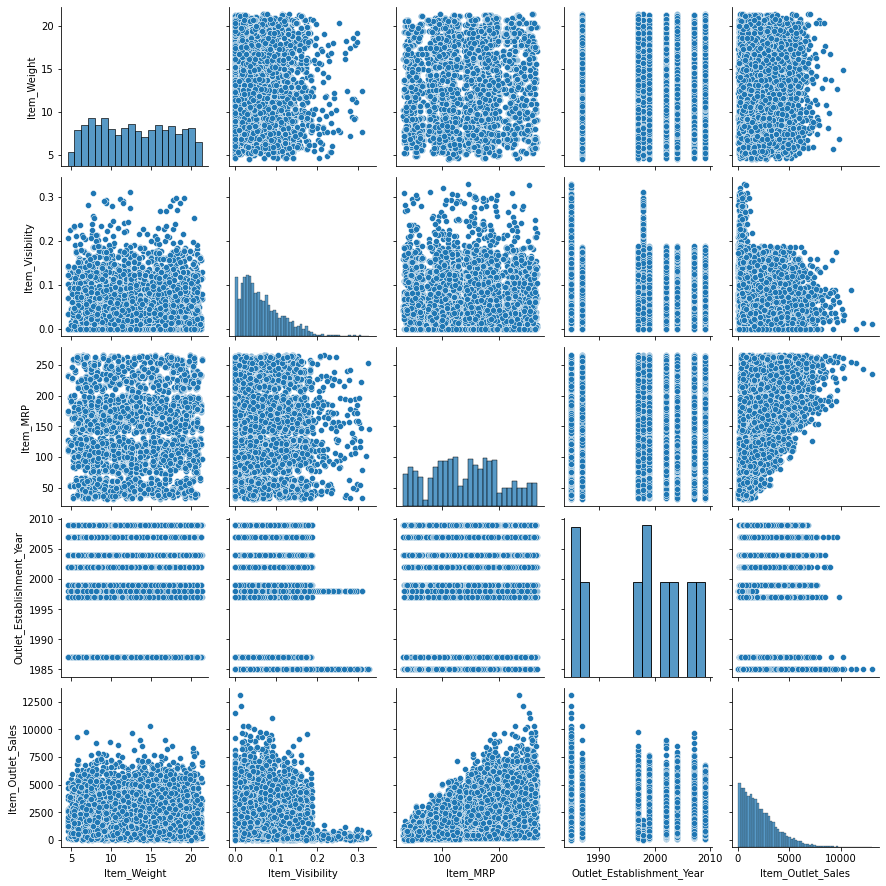

In [7]:
sns.pairplot(df)

In [8]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [13]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
pd.crosstab([df.Item_Type,df.Item_Fat_Content],[df.Outlet_Size,df.Outlet_Type],margins=True).T.style.background_gradient()

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

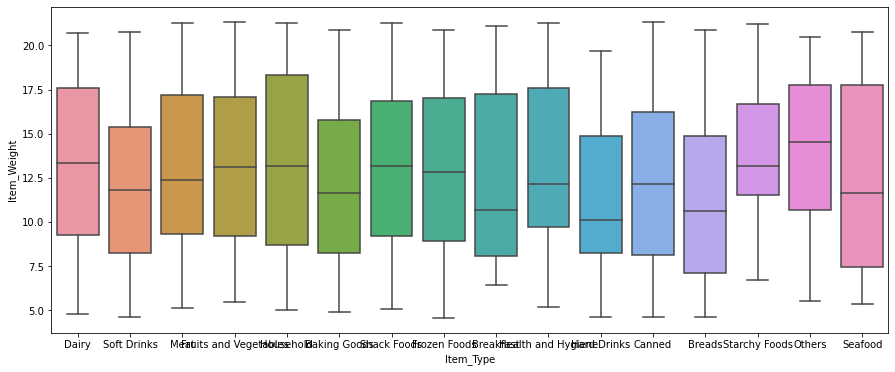

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Item_Type', y='Item_Weight', data=df )

In [16]:
pd.crosstab([df.Item_Type,],[df.Item_Weight.isnull()])

Item_Weight,False,True
Item_Type,,
Baking Goods,536,112
Breads,204,47
Breakfast,89,21
Canned,539,110
Dairy,566,116
Frozen Foods,718,138
Fruits and Vegetables,1019,213
Hard Drinks,183,31
Health and Hygiene,430,90


we could have put the missing weight as per the Item type - but all have similar mean so will use mean to fill the data 

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [19]:
sum(df.Item_Weight.isnull())

0

In [20]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

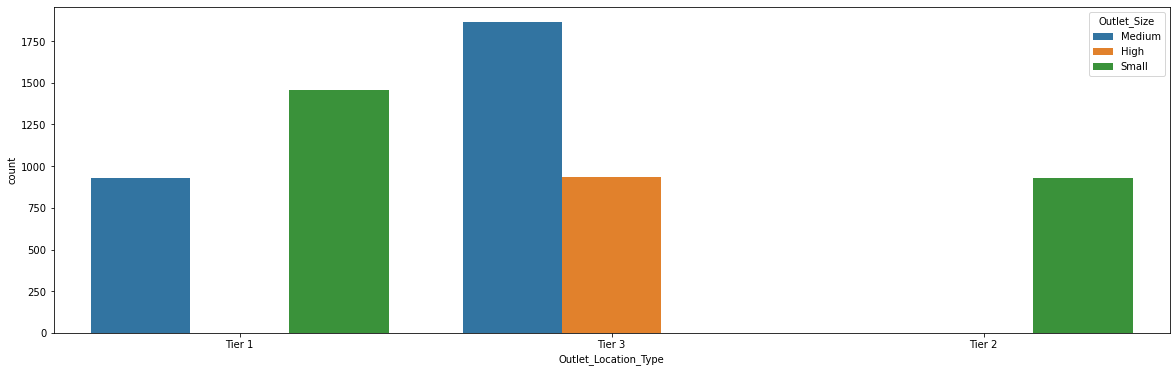

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Size', data=df )

In [22]:
pd.crosstab([df.Outlet_Location_Type,df.Outlet_Identifier],[df.Outlet_Size.isnull()])

Outlet_Size                             False  True 
Outlet_Location_Type Outlet_Identifier              
Tier 1               OUT019               528      0
                     OUT046               930      0
                     OUT049               930      0
Tier 2               OUT017                 0    926
                     OUT035               930      0
                     OUT045                 0    929
Tier 3               OUT010                 0    555
                     OUT013               932      0
                     OUT018               928      0
                     OUT027               935      0

In [23]:
pd.crosstab([df.Outlet_Type,df.Outlet_Identifier],[df.Outlet_Size.isnull()])

Outlet_Size                          False  True 
Outlet_Type       Outlet_Identifier              
Grocery Store     OUT010                 0    555
                  OUT019               528      0
Supermarket Type1 OUT013               932      0
                  OUT017                 0    926
                  OUT035               930      0
                  OUT045                 0    929
                  OUT046               930      0
                  OUT049               930      0
Supermarket Type2 OUT018               928      0
Supermarket Type3 OUT027               935      0

In [24]:
pd.crosstab([df.Outlet_Type,df.Outlet_Identifier],[df.Outlet_Size])

Outlet_Size                          High  Medium  Small
Outlet_Type       Outlet_Identifier                     
Grocery Store     OUT019                0       0    528
Supermarket Type1 OUT013              932       0      0
                  OUT035                0       0    930
                  OUT046                0       0    930
                  OUT049                0     930      0
Supermarket Type2 OUT018                0     928      0
Supermarket Type3 OUT027                0     935      0

         OBSERVATION 
ALL THE OUTLET SIZE PRESENT IN Outlet_Location_Type - TIER 3  ARE SMALL  ----- SO WE FILLED THAT DATA (AS SEEN IN COUNTPLOT )                   
THE REMAINING EMPLY COLUMNS ARE LEFT FOR Outlet_Identifier - OUT010         
WHICH ON LATER ANANLYSIS FOUND OUT TO BE --- Grocery Store - WHICH ASLO BELONG TO THE   OUTLET SIZE - SMALL 

In [25]:
df.loc[(df.Outlet_Size.isnull())&(df.Outlet_Location_Type=='Tier 2'),'Outlet_Size']='Small'

In [26]:
df.loc[(df.Outlet_Size.isnull())&(df.Outlet_Type=='Grocery Store'),'Outlet_Size']='Small'

In [27]:
sum(df.Outlet_Size.isnull())

0

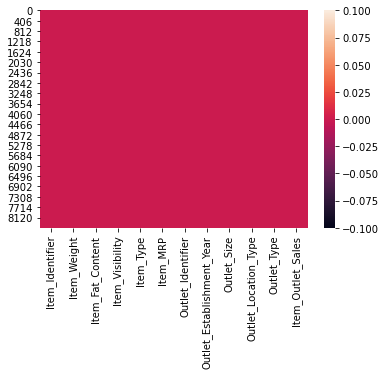

In [28]:
sns.heatmap(df.isna())
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()

In [30]:
for x in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    df.loc[:,x]=le.fit_transform(df.loc[:,x])

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Checking outliers 

Item_Identifier                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Weight                  AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Fat_Content              AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_Visibility              AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Item_Type                    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Item_MRP                        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Identifier            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Outlet_Establishment_Year     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Outlet_Size                  AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Outlet_Location_Type         AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Outlet_Type                        AxesSubplot(0.125,0.125;0.133621x0.222059)
Item_Outlet_Sales               AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

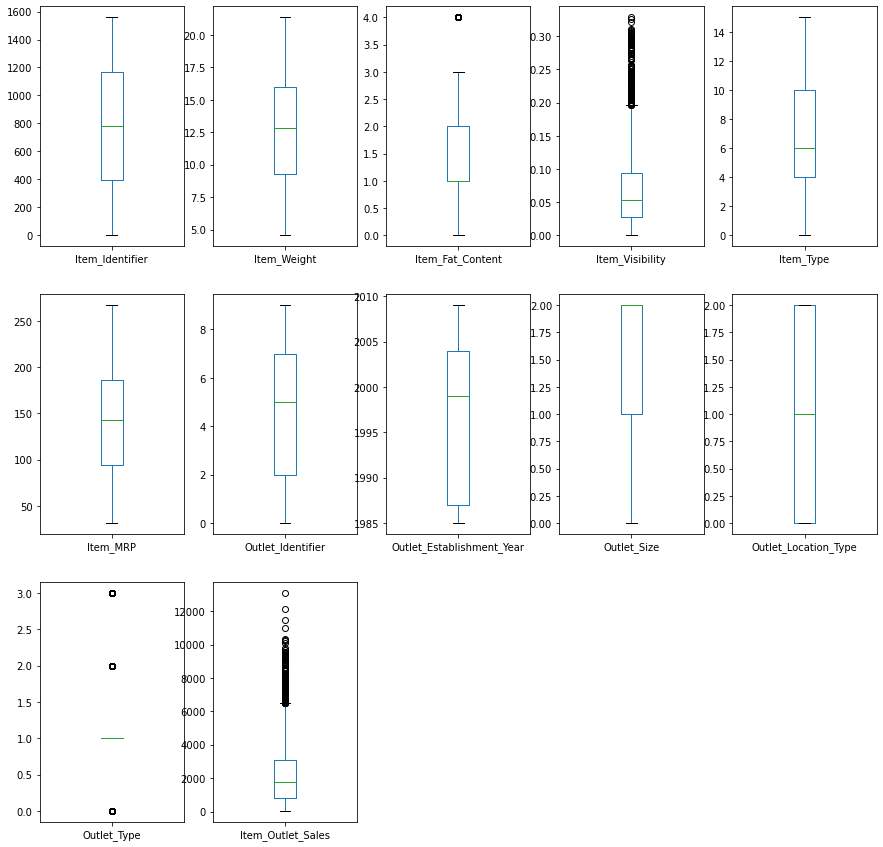

In [32]:
df.plot(kind='box',subplots=True, layout=(3,5),figsize=(15,15))

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

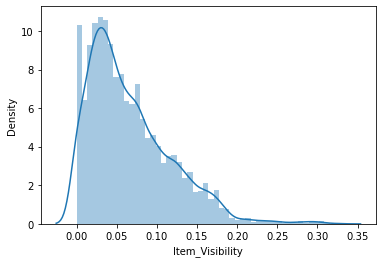

In [33]:
sns.distplot(df.Item_Visibility)

In [34]:
sum(df.Item_Visibility == 0)

526

In [35]:
df.shape

(8523, 12)

In [36]:
from scipy.stats import zscore
z=zscore(df,axis=1)
df=df[(z<3).all(axis=1)]

In [37]:
df.shape

(6658, 12)

<AxesSubplot:>

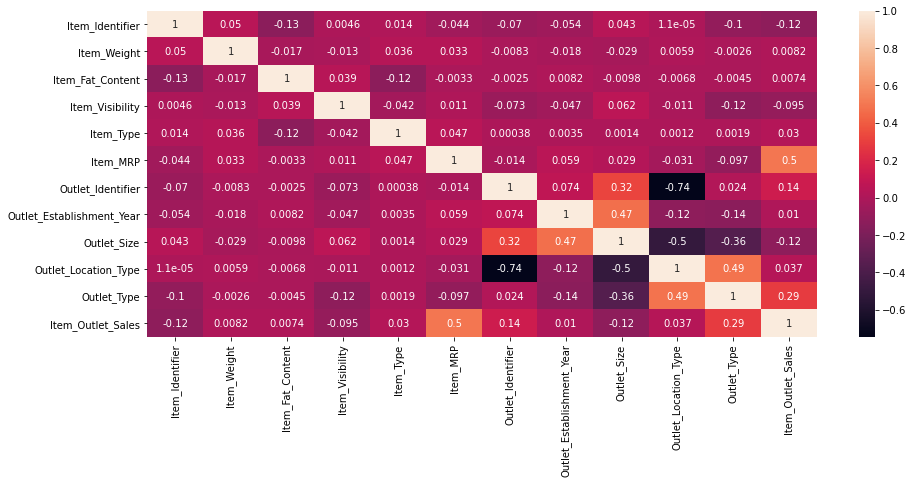

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

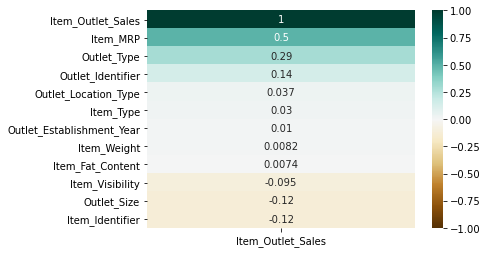

In [39]:
sns.heatmap(df.corr()[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG') 

In [40]:
df.skew()

Item_Identifier             -0.246626
Item_Weight                  0.090642
Item_Fat_Content             1.012942
Item_Visibility              1.060464
Item_Type                    0.036577
Item_MRP                     0.194398
Outlet_Identifier           -0.091989
Outlet_Establishment_Year   -0.493980
Outlet_Size                 -0.831043
Outlet_Location_Type        -0.180359
Outlet_Type                  1.102729
Item_Outlet_Sales            0.395308
dtype: float64

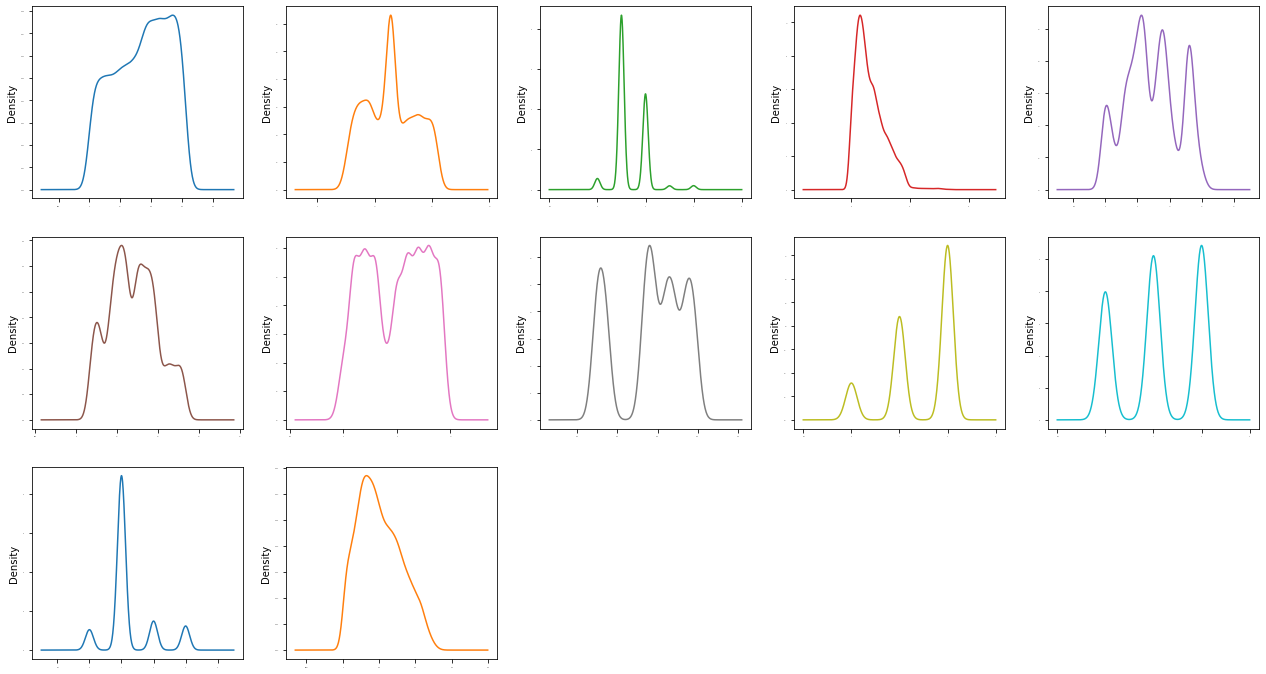

In [42]:
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False, legend=False, fontsize=1, figsize=(22,12))
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
for x in df.columns:
    df[x]=sc.fit_transform(df[x].values.reshape(-1,1))

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.578594,-0.819092,-0.558559,-0.976929,-0.775209,1.911711,1.463426,0.068267,-0.631438,-1.376054,-0.312986,1.465443
2,-0.435829,1.065367,-0.558559,-0.962498,0.675421,0.052253,1.463426,0.068267,-0.631438,-1.376054,-0.312986,0.061492
3,0.600790,1.456048,0.992270,-1.301828,-0.291666,0.747922,-1.721067,-0.053850,0.811787,1.127162,-1.679454,-1.108468
4,0.998274,-0.904122,-0.558559,-1.301828,0.433649,-1.456000,-1.367235,-1.397140,-2.074663,1.127162,-0.312986,-0.883608
7,-0.264188,-0.001502,-0.558559,1.278967,1.400736,-0.529619,0.048095,-1.641375,-0.631438,1.127162,2.419949,1.711991


In [48]:
df.skew()

Item_Identifier             -0.246626
Item_Weight                  0.090642
Item_Fat_Content             1.012942
Item_Visibility              1.060464
Item_Type                    0.036577
Item_MRP                     0.194398
Outlet_Identifier           -0.091989
Outlet_Establishment_Year   -0.493980
Outlet_Size                 -0.831043
Outlet_Location_Type        -0.180359
Outlet_Type                  1.102729
Item_Outlet_Sales            0.395308
dtype: float64

In [171]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error,r2_score,classification_report,confusion_matrix

In [69]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6658 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6658 non-null   float64
 1   Item_Weight                6658 non-null   float64
 2   Item_Fat_Content           6658 non-null   float64
 3   Item_Visibility            6658 non-null   float64
 4   Item_Type                  6658 non-null   float64
 5   Item_MRP                   6658 non-null   float64
 6   Outlet_Identifier          6658 non-null   float64
 7   Outlet_Establishment_Year  6658 non-null   float64
 8   Outlet_Size                6658 non-null   float64
 9   Outlet_Location_Type       6658 non-null   float64
 10  Outlet_Type                6658 non-null   float64
 11  Item_Outlet_Sales          6658 non-null   float64
dtypes: float64(12)
memory usage: 676.2 KB


# selecting the best random state and model 

In [103]:

def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        md_predict=md.predict(X_test)
        r2score=r2_score(y_test,md_predict)
        if max_score<r2score:
            max_score=r2score
            max_state=x
    print("Max random state is {} and r2score is {}".format(max_state,max_score))

In [104]:
model_select(LinearRegression)

Max random state is 81 and r2score is 0.4280426714156418


In [105]:
model_select(AdaBoostRegressor)

Max random state is 81 and r2score is 0.5277839316490028


In [109]:
model_select(RandomForestRegressor)

Max random state is 73 and r2score is 0.5026221215320448


In [106]:
model_select(KNeighborsRegressor)

Max random state is 66 and r2score is 0.4481764006356148


In [107]:
model_select(Ridge)

Max random state is 81 and r2score is 0.42803599542221415


In [108]:
model_select(ElasticNet)

Max random state is 92 and r2score is 0.006931974990517564


# Tuning the best two algorithms 

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=81)

# AdaBoostRegressor

In [177]:
ag=AdaBoostRegressor()
ag.fit(X_train,y_train)
predict=ag.predict(X_test)
r2= r2_score(y_test,predict)
print(r2)
print('mean squared error : ',mean_squared_error(y_test,predict))

0.520181139842875
mean squared error :  0.4818336315939106


In [196]:
scores = cross_val_score(ag, X_train, y_train, scoring='r2', cv=10)
print(scores)
print('mean score',sum(scores)/len(scores))

[0.43492334 0.45191161 0.47450829 0.47412108 0.45656135 0.47988359
 0.46307014 0.43076991 0.49396498 0.46704557]
mean score 0.4626759854375077


In [198]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 81)
scores = cross_val_score(ag, X_train, y_train, scoring='r2', cv=10)
print(scores)
print('mean score',sum(scores)/len(scores))

[0.44545413 0.45498743 0.46977485 0.47164628 0.46003143 0.47033614
 0.4737509  0.43597655 0.50477356 0.47721061]
mean score 0.466394187703761


In [161]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100,150,200,250],
 'learning_rate' : [0.01,0.05,0.1,0.3,.4,.5,.6,.8,.1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 100,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.4, 0.5, 0.6, 0.8,
                                                          0.1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]})

In [162]:
pre_gs_inst.best_params_

{'n_estimators': 250, 'loss': 'exponential', 'learning_rate': 0.05}

In [163]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2score=r2_score(y_test,predictions)
    

    print('Model Performance')
    print('r2 score = ', r2score)
    print('mean_squared_error:  ', mean_squared_error(y_test,predictions))
    
    return 

In [170]:
best_rn = pre_gs_inst.best_estimator_
grid_accuracy = evaluate(best_rn, X_test, y_test)  

Model Performance
r2 score =  0.5346737032169461
mean_squared_error:   0.46728021358248256


# Random Forest 

In [199]:
from sklearn.model_selection import GridSearchCV

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15 ,  random_state=73)

In [209]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)
print('r2 score : ',r2_score(y_test,predict))
r2= r2_score(y_test,predict)
print('mean squared error : ',mean_squared_error(y_test,predict))

r2 score :  0.5228734126959477
mean squared error :  0.47981937998196705


In [212]:
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=folds)
print(scores)
print('mean score',sum(scores)/len(scores))

[0.43560921 0.44714291 0.44938822 0.46352849 0.46411794]
mean score 0.45195735764986633


In [213]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 81)
scores = cross_val_score(ag, X_train, y_train, scoring='r2', cv=10)
print(scores)
print('mean score',sum(scores)/len(scores))

[0.49687734 0.48603727 0.50072701 0.48221898 0.47659094 0.48084782
 0.46406289 0.46495974 0.46562185 0.43776556]
mean score 0.47557093941846096


In [150]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
   
}


In [ ]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [152]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [153]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2score=r2_score(y_test,predictions)
     

    print('Model Performance')
    print('r2 score = ', r2score)
    print('mean_squared_error:  ', mean_squared_error(y_test,predictions))
    
    return 

In [155]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)  

Model Performance
r2 score =  0.5351250376667824
mean_squared_error:   0.46807297332369835


In [215]:
from sklearn.feature_selection import RFE
folds = KFold(n_splits = 5, shuffle = True, random_state = 73)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
rf.fit(X_train, y_train)
rfe = RFE(rf)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=73, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [217]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.800517,0.853042,0.049532,3.350066e-03,2,{'n_features_to_select': 2},0.321064,0.270018,0.286515,0.278021,...,0.294402,0.020589,38,0.867487,0.867336,0.865974,0.869800,0.867923,0.867704,0.001234
1,24.040184,0.561622,0.053572,7.334882e-03,3,{'n_features_to_select': 3},0.425831,0.362873,0.404107,0.383415,...,0.401220,0.025388,37,0.915674,0.920356,0.917447,0.918630,0.916711,0.917764,0.001615
2,22.165400,0.030759,0.048315,1.999616e-03,4,{'n_features_to_select': 4},0.418661,0.391946,0.399255,0.389301,...,0.407444,0.018436,35,0.918284,0.918880,0.916877,0.918197,0.915747,0.917597,0.001133
3,20.756689,0.416280,0.046401,3.189063e-03,5,{'n_features_to_select': 5},0.416128,0.379175,0.391823,0.387579,...,0.401732,0.020263,36,0.915694,0.918117,0.916988,0.917271,0.915624,0.916739,0.000957
4,17.742310,0.048425,0.053540,8.186257e-03,6,{'n_features_to_select': 6},0.458937,0.420780,0.415996,0.419544,...,0.432785,0.017535,34,0.919260,0.922007,0.921528,0.922082,0.919693,0.920914,0.001197
5,15.139385,0.040164,0.055749,5.587240e-03,7,{'n_features_to_select': 7},0.457155,0.416400,0.420166,0.418651,...,0.433867,0.018974,33,0.919213,0.920516,0.922011,0.921520,0.920336,0.920719,0.000976
6,12.537423,0.268797,0.049551,1.394516e-03,8,{'n_features_to_select': 8},0.465548,0.435991,0.431950,0.431543,...,0.443808,0.013630,22,0.921727,0.922181,0.920992,0.923062,0.922114,0.922015,0.000673
7,9.449861,0.037582,0.046168,1.422263e-03,9,{'n_features_to_select': 9},0.459303,0.426913,0.439913,0.431855,...,0.444100,0.014375,21,0.922449,0.922468,0.921566,0.922037,0.921409,0.921986,0.000438
8,6.380697,0.027720,0.052350,6.812877e-03,10,{'n_features_to_select': 10},0.469425,0.421780,0.434572,0.429344,...,0.442575,0.018016,29,0.922133,0.922074,0.921558,0.923810,0.922802,0.922475,0.000775
9,3.213978,0.013771,0.047265,7.737651e-04,11,{'n_features_to_select': 11},0.473568,0.436248,0.439889,0.435720,...,0.446677,0.014140,3,0.922288,0.923396,0.923339,0.923399,0.921456,0.922775,0.000784


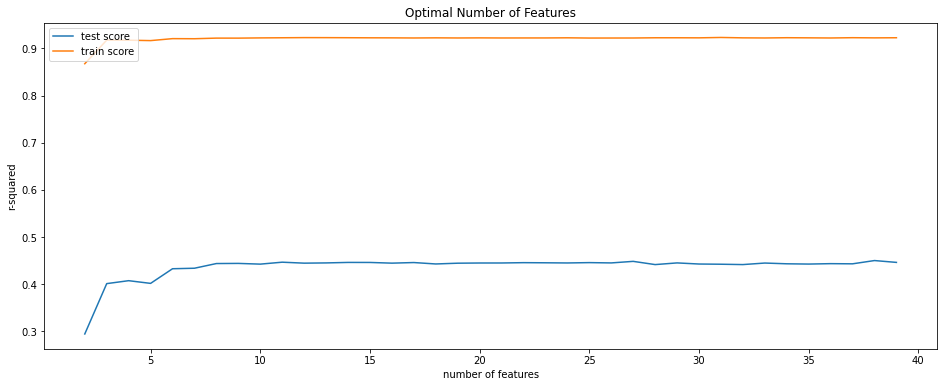

In [218]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# saving the model 

In [219]:
import joblib 
joblib.dump(rf,'BigMart.pkl')

['BigMart.pkl']

In [221]:
model=joblib.load('BigMart.pkl')
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.5133027192484345